In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.environments import Env
from src.agents import AgentEWA, AgentQ

In [40]:
# env = Env(payoff_structure=(0.6, 0.3, 0.1))
env = Env(payoff_structure=(0.9,0.1,0.5))
agentEWA1 = AgentEWA("A", sigma=0, theta=1)
agentEWA2 = AgentEWA("B")
agentQ1 = AgentQ("C", epsilon=1)

EPISODES = 2000
RUN_LENGTH = 1000

payoffs_Q = np.zeros([EPISODES, RUN_LENGTH])
payoffs_EWA = np.zeros([EPISODES, RUN_LENGTH])

for episode in range(EPISODES):

    agentQ = AgentQ('Alice')
    agentEWA = AgentEWA('Bob')
    agentQ_greedy = AgentQ("D", epsilon=0)

    env.reset()
    for i in range(RUN_LENGTH):
        actions_this_round = {}
        actions_last_round =  None if (i == 0) else env.history[-1] # TODO?

        # if i % 250 == 0: 
        #     env.switch()

        for agent in (agentQ, agentQ_greedy, agentEWA):
            choice = agent.choose_action(obs=actions_last_round)
            actions_this_round[agent.id] = choice
            reward, is_optimal = env.return_rewards(choice)
            agent.update_state(reward, is_optimal)
            agent.update_Qvals(choice, reward)

        env.history.append(actions_this_round)
    
    # print(len(agentQ_greedy.payoffs))
    payoffs_Q[episode, :] = agentQ_greedy.payoffs
    payoffs_EWA[episode, :] = agentEWA.payoffs


(0.0, 1.0)

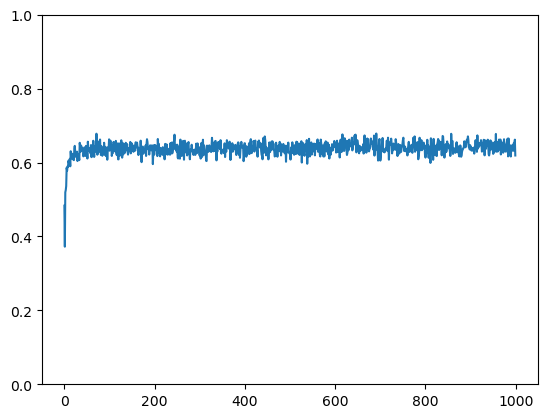

In [42]:
plt.plot(np.mean(payoffs_EWA, axis=0))
plt.ylim(0,1)

### Q-learning

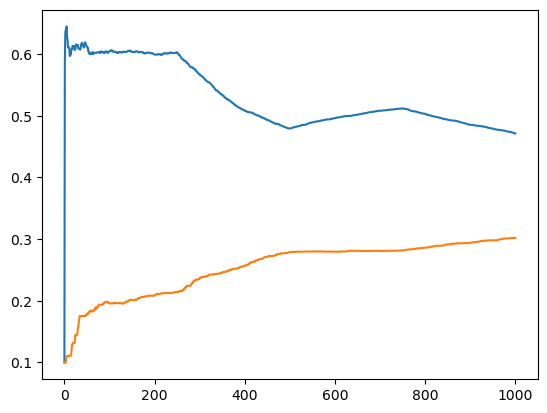

In [7]:
plt.plot(agentQ.Q_vals)

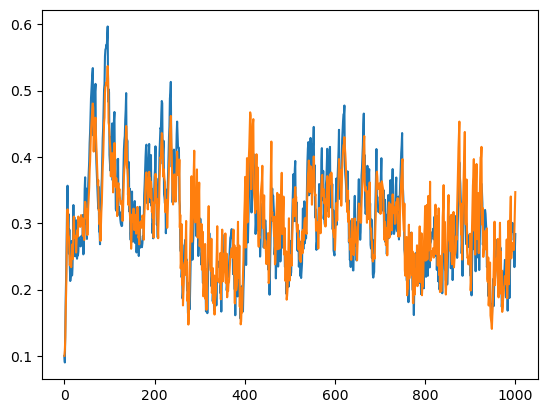

In [5]:
plt.plot(agentEWA.Q_vals)

<Axes: ylabel='Density'>

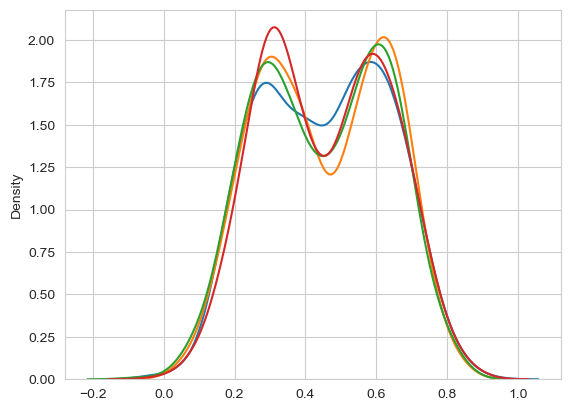

In [52]:
sns.set_style('whitegrid')
sns.kdeplot(agentEWA1.payoffs)
sns.kdeplot(agentEWA2.payoffs)
sns.kdeplot(agentQ1.payoffs)
sns.kdeplot(agentQg.payoffs)

In [11]:
print(np.mean(agentEWA1.correct), np.mean(agentQ1.correct) )

0.501 0.476


446.84698492019896 441.1802904727145


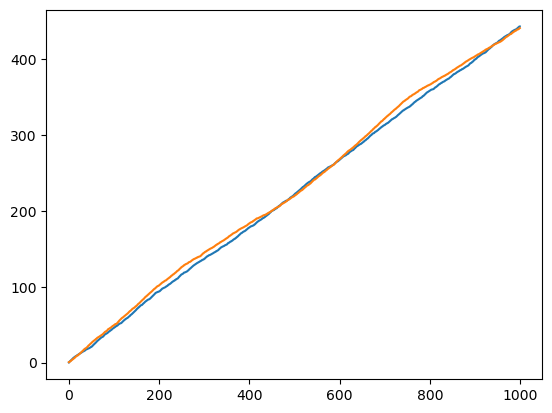

In [12]:
# plt.plot(np.cumsum(agentEWA1.payoffs))
plt.plot(np.cumsum(agentEWA2.payoffs))
plt.plot(np.cumsum(agentQ1.payoffs))

print(np.sum(agentEWA1.payoffs),np.sum(agentQ1.payoffs))